<a href="https://colab.research.google.com/github/YuvrajRakheja/Weather-Prediction/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd# data processing
import os



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
data=pd.read_csv("/content/seattle-weather.csv")
data.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
data.shape


(1461, 6)

<AxesSubplot:xlabel='weather', ylabel='count'>

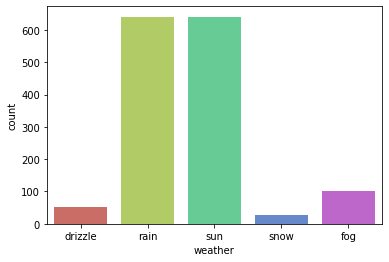

In [5]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot("weather",data=data,palette="hls")


In [6]:
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


In [7]:
data[["precipitation","temp_max","temp_min","wind"]].describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<AxesSubplot:xlabel='wind', ylabel='Count'>

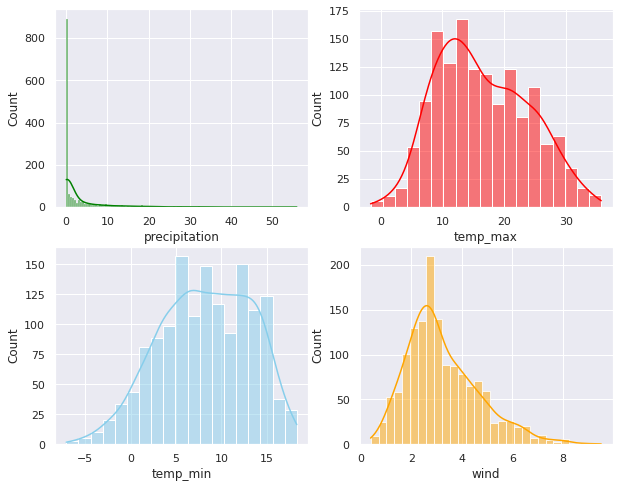

In [8]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')


<AxesSubplot:xlabel='wind'>

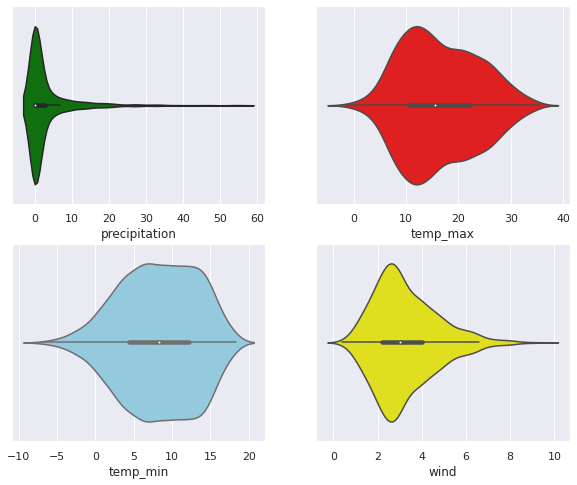

In [9]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="wind",kde=True,ax=axs[1,1],color='yellow')

<AxesSubplot:xlabel='precipitation', ylabel='weather'>

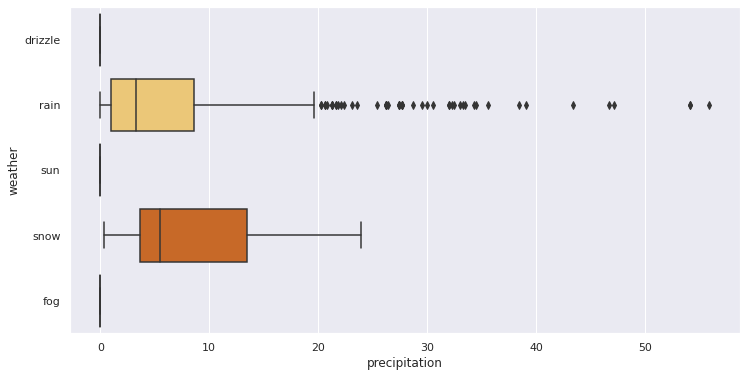

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot("precipitation","weather",data=data,palette="YlOrBr")


<AxesSubplot:xlabel='temp_max', ylabel='weather'>

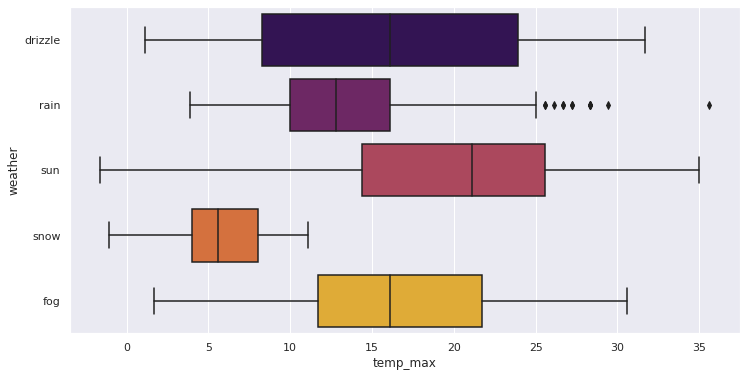

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot("temp_max","weather",data=data,palette="inferno")


<AxesSubplot:xlabel='wind', ylabel='weather'>

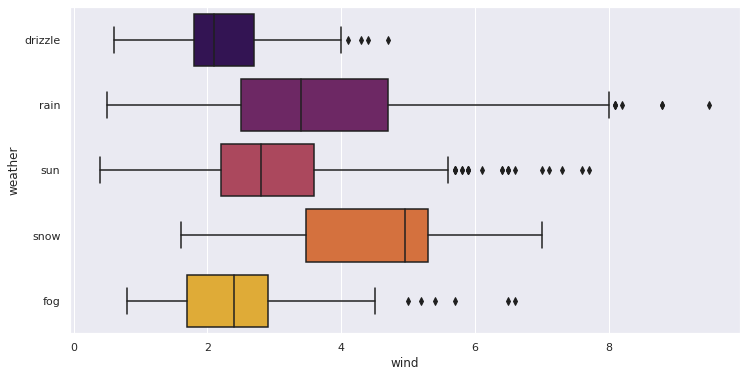

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot("wind","weather",data=data,palette="inferno")


<AxesSubplot:xlabel='temp_min', ylabel='weather'>

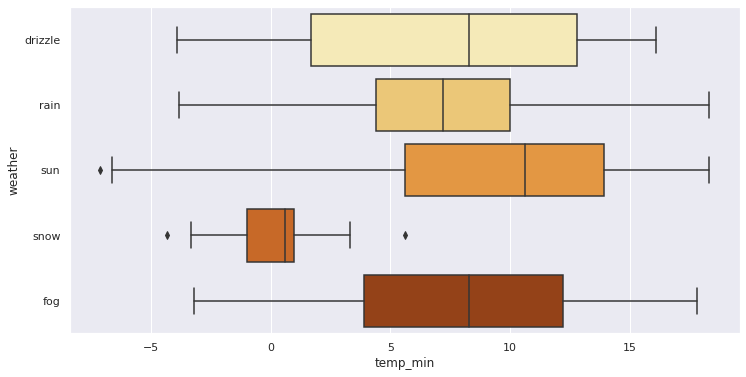

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot("temp_min","weather",data=data,palette="YlOrBr")

<AxesSubplot:>

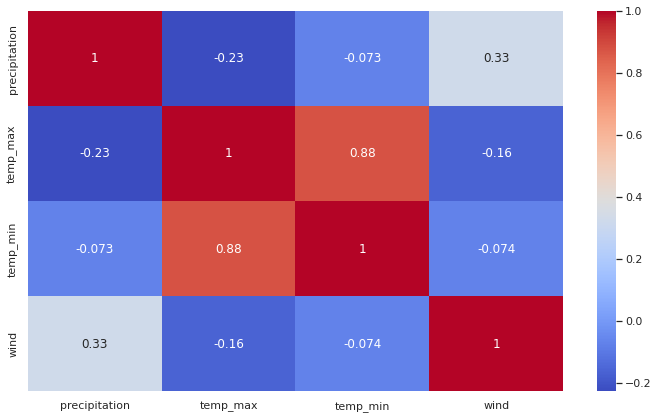

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Pearson correlation: -0.22855481643297046
T Test and P value: Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


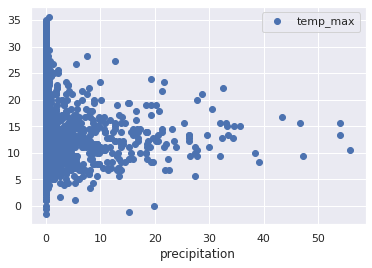

In [15]:
data.plot("precipitation","temp_max",style='o') 
print("Pearson correlation:",data["precipitation"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["precipitation"],data["temp_max"]))


Pearson correlation: -0.16485663487495486
T Test and P value: Ttest_indResult(statistic=-67.3601643301846, pvalue=0.0)


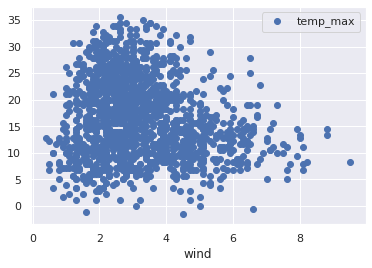

In [16]:
data.plot("wind","temp_max",style='o') 
print("Pearson correlation:",data["wind"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["wind"],data["temp_max"]))


<AxesSubplot:xlabel='temp_max'>

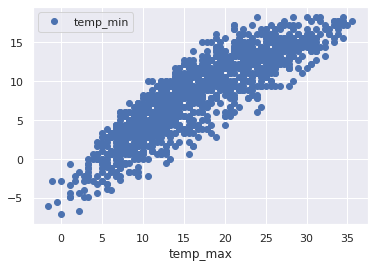

In [17]:
data.plot("temp_max","temp_min",style='o') 

In [18]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

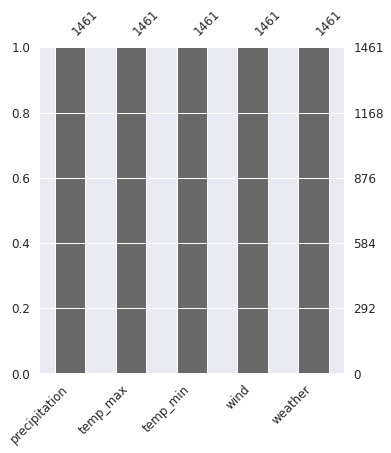

In [19]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(["date"],axis=1),ax=axz,fontsize=12);

DATA PREPROCESSING

In [20]:
df=data.drop(["date"],axis=1)


In [21]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


In [22]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)


<AxesSubplot:xlabel='wind', ylabel='Count'>

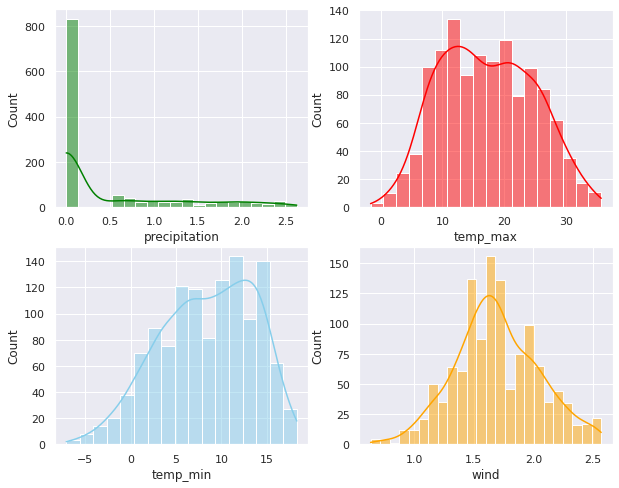

In [23]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [24]:
df.head()


,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


Scaling the weather variables using label Encoder

In [25]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])


In [26]:
df.head()


,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


SPLITTING THE DATASET INTO DEPENDANT AND INDEPENDANT VARIABLES:



In [27]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values


In [28]:
df.weather.unique()


array([0, 2, 4, 3, 1])

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)


Model training

K-NEAREST NEIGHBOR CLASSIFIER:



In [31]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))


KNN Accuracy:75.00%


SUPPORT VECTOR MACHINE - CLASSIFIER:



In [32]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))


SVM Accuracy:77.42%


GRADIENT BOOSTING CLASSIFIER:

In [33]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))


Gradient Boosting Accuracy:81.45%


EXTREME GRADIENT BOOSTING OR XGBCLASSIFIER:



In [34]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))


XGB Accuracy:83.06%


CHECKING

In [35]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=xgb.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain
